<a href="https://colab.research.google.com/github/mindymj777/DataMining_DecisionTree/blob/main/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text,export_graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import linear_model,svm,ensemble


讀取檔案並且將不需要的feature去除(id)

In [ ]:
df=pd.read_csv('Bank_Customer.csv')
df =df.drop('customer_id', axis=1)

共10000筆資料,前十行為model的features,最後一行為欲預測的標籤(churn)

In [ ]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


觀察資料型態發現country、gender都是Categorical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


資料集相關統計值

In [ ]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


用戶年齡的分布(30-40歲的資料占多數)

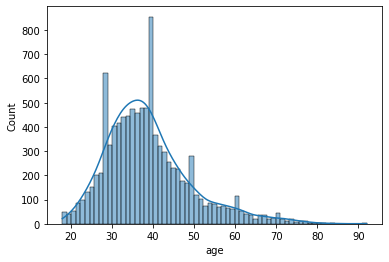

In [ ]:
sns.histplot(data=df[['age']], x='age', kde=True)

churn=0的資料多於churn=1

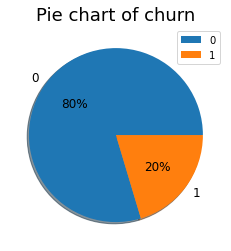

In [ ]:
plt.pie(df['churn'].value_counts(),                  
    labels=['0','1'], 
    autopct='%1.0f%%',
    pctdistance = 0.6,              #數字距圓心的距離
    textprops = {"fontsize" : 12},         #文字大小
    shadow=True)                    #設定陰影
plt.title("Pie chart of churn", {"fontsize" : 18})  #設定標題及其文字大小
plt.legend(loc = "best")        

男生的資料量較多，但女生的續約率大於男生

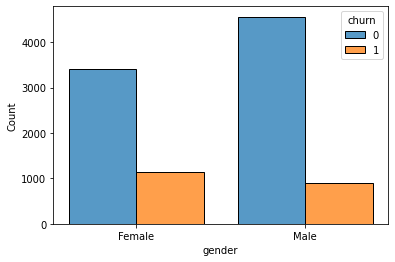

In [ ]:
sns.histplot(data=df, x='gender', hue='churn',multiple='dodge', shrink=.8)

由下圖可以發現不管是男或女在churn=1(橘)的年齡平均較churn=0(藍)的年齡平均高

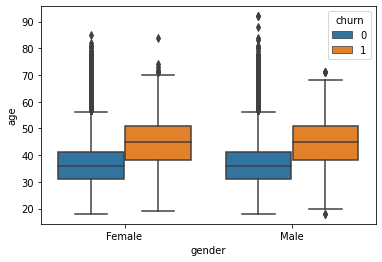

In [ ]:
sns.boxplot(x="gender",y="age",hue="churn",data=df) # 繪製盒狀圖

法國資料量最多，但德國續約率較高

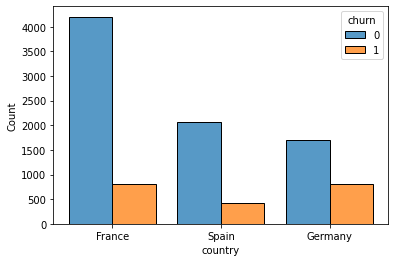

In [ ]:
sns.histplot(data=df, x='country', hue='churn', multiple='dodge', shrink=.8)

從下圖可以發現churn跟年齡比較有關係

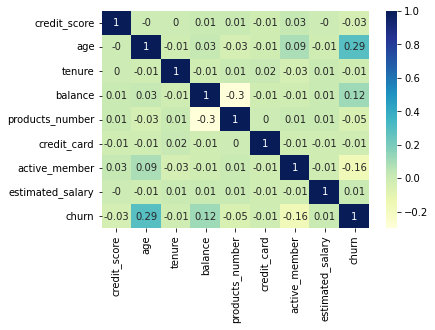

In [ ]:
sns.heatmap(data=df.corr().round(2),cmap="YlGnBu",annot=True)

將類別型資料轉成數值

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=False)
df_encoded

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [ ]:
y = pd.DataFrame(df_encoded['churn'])                   
x = df_encoded.drop(['churn'], axis=1)   

建立最基本的decision model(不更改任何參數)做cross validation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier()
cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()

0.7862857142857144

將max_depth的值設為1到15建立model，將準確率計算出來並加入矩陣中

In [ ]:
acc_array_gini=[]
acc_array_entropy=[]
for max_depth in range(15):
  dtree_gini = DecisionTreeClassifier(max_depth=max_depth+1, criterion='gini', min_samples_leaf=2)
  acc_array_gini.append(cross_val_score(dtree_gini,x_train,y_train,cv=10,scoring='accuracy').mean())
  dtree_entropy = DecisionTreeClassifier(max_depth=max_depth+1, criterion='entropy', min_samples_leaf=2)
  acc_array_entropy.append(cross_val_score(dtree_entropy,x_train,y_train,cv=10,scoring='accuracy').mean())

acc_array_gini=pd.DataFrame(acc_array_gini,columns=['score'])
acc_array_entropy=pd.DataFrame(acc_array_entropy,columns=['score'])

將準確率畫折線圖選擇較優的max_depth

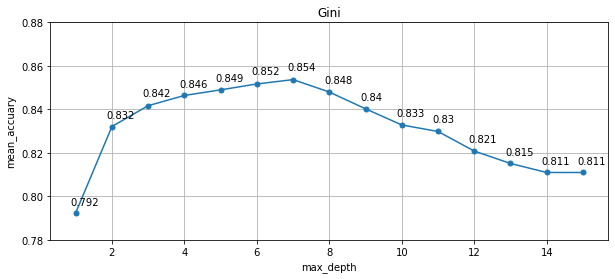

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(acc_array_gini.index+1,acc_array_gini['score'],markersize="10", marker=".")
plt.grid(True)
plt.ylim(0.78,0.88)
plt.title("Gini") # title
plt.ylabel("mean_accuary") # y label
plt.xlabel("max_depth") # x label
for i,j in zip(acc_array_gini['score'].round(3),acc_array_gini.index+1):
  plt.text(j-0.15,i+0.004,i,fontsize=10)

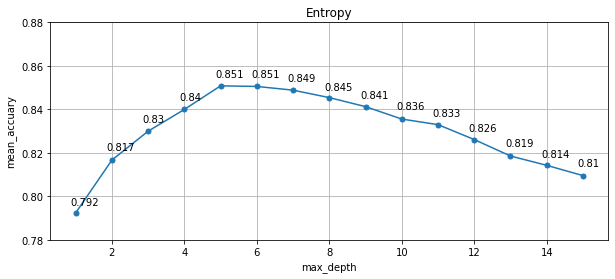

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(acc_array_entropy.index+1,acc_array_entropy['score'],markersize="10", marker=".")
plt.grid(True)
plt.ylim(0.78,0.88)
plt.title("Entropy") # title
plt.ylabel("mean_accuary") # y label
plt.xlabel("max_depth") # x label
for i,j in zip(acc_array_entropy['score'].round(3),acc_array_entropy.index+1):
  plt.text(j-0.15,i+0.004,i,fontsize=10)

由上圖可以發現criterion="gini"時準確率最高發生在max_depth=7，criterion="entropy"時準確率最高發生在max_depth=5，但仔細看可以發現兩者從max_depth=4時準確率就相當不錯與最高準確率相差並不大，為了圖表美觀方便查看和模型效能因此兩者都選擇max_depth=4去建立模型。 

In [ ]:
model_gini=DecisionTreeClassifier(criterion="gini", max_depth=4,min_samples_leaf=2,random_state=30)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=30)

 
**The rules used to classify the data**

In [ ]:
text_representation = export_text(model_gini,feature_names=list(x.columns))
print(text_representation)

|--- age <= 44.50
|   |--- products_number <= 2.50
|   |   |--- products_number <= 1.50
|   |   |   |--- age <= 38.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  38.50
|   |   |   |   |--- class: 0
|   |   |--- products_number >  1.50
|   |   |   |--- balance <= 108284.74
|   |   |   |   |--- class: 0
|   |   |   |--- balance >  108284.74
|   |   |   |   |--- class: 0
|   |--- products_number >  2.50
|   |   |--- balance <= 57003.37
|   |   |   |--- age <= 37.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  37.50
|   |   |   |   |--- class: 1
|   |   |--- balance >  57003.37
|   |   |   |--- estimated_salary <= 188544.70
|   |   |   |   |--- class: 1
|   |   |   |--- estimated_salary >  188544.70
|   |   |   |   |--- class: 0
|--- age >  44.50
|   |--- active_member <= 0.50
|   |   |--- age <= 51.50
|   |   |   |--- products_number <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- products_number >  1.50
|   |   |   |   |--- class: 0
|   |   |--- age >  51.50
|  

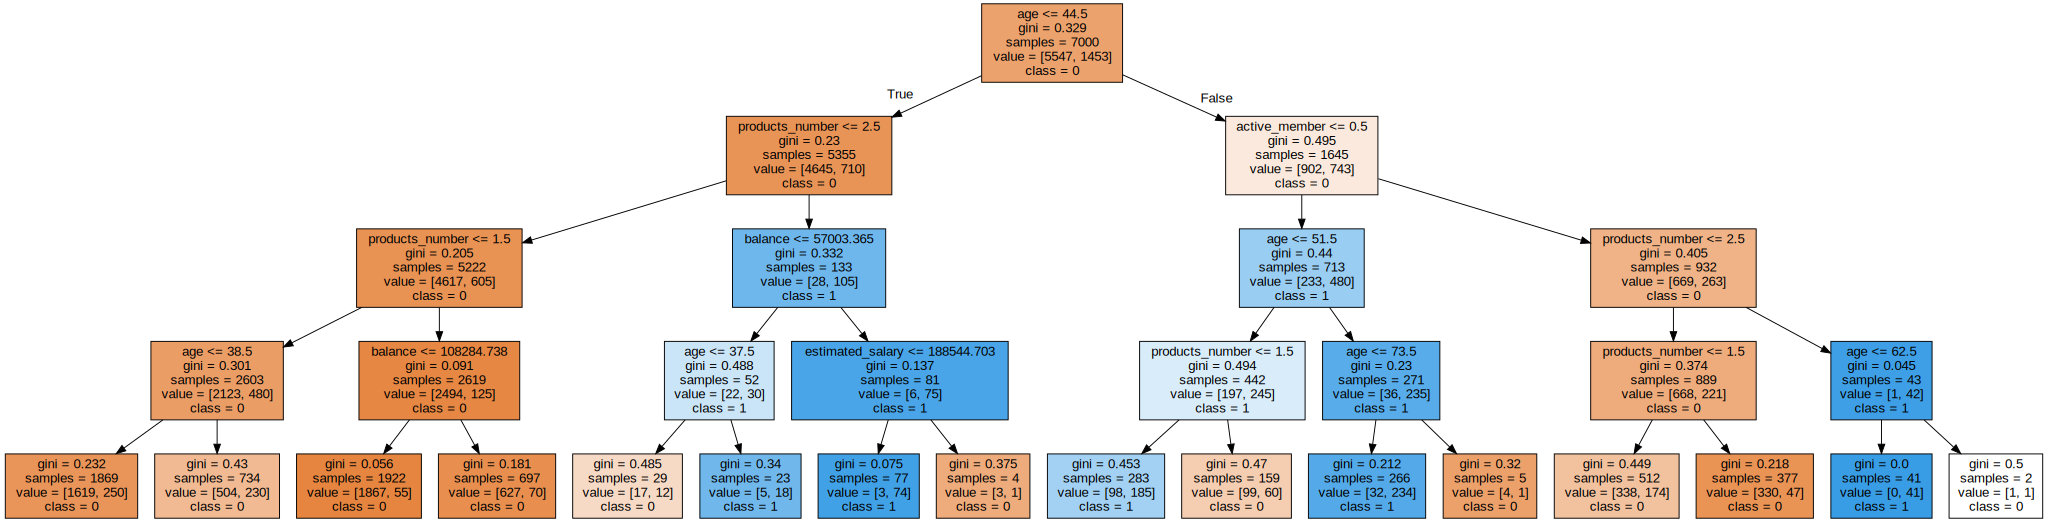

In [ ]:
import graphviz
# DOT data
dot_data =export_graphviz(model_gini, out_file=None, 
              feature_names=x.columns,  
              class_names=['0', '1'],
              filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.format = "png"
graph.render("pic1")
graph

In [ ]:
model_entropy=DecisionTreeClassifier(criterion="entropy", max_depth=5,min_samples_leaf=2,random_state=32)
model_entropy.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=32)

In [ ]:
text_representation = export_text(model_entropy,feature_names=list(x.columns))
print(text_representation)

|--- age <= 41.50
|   |--- products_number <= 2.50
|   |   |--- products_number <= 1.50
|   |   |   |--- country_Germany <= 0.50
|   |   |   |   |--- balance <= 75122.84
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- balance >  75122.84
|   |   |   |   |   |--- class: 0
|   |   |   |--- country_Germany >  0.50
|   |   |   |   |--- age <= 32.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  32.50
|   |   |   |   |   |--- class: 0
|   |   |--- products_number >  1.50
|   |   |   |--- balance <= 108284.74
|   |   |   |   |--- age <= 39.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  39.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- balance >  108284.74
|   |   |   |   |--- balance <= 110932.54
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- balance >  110932.54
|   |   |   |   |   |--- class: 0
|   |--- products_number >  2.50
|   |   |--- balance <= 23194.08
|   |   |   |--- estimated_salary <= 167555.12
|   |   |   |   |--- age <= 37

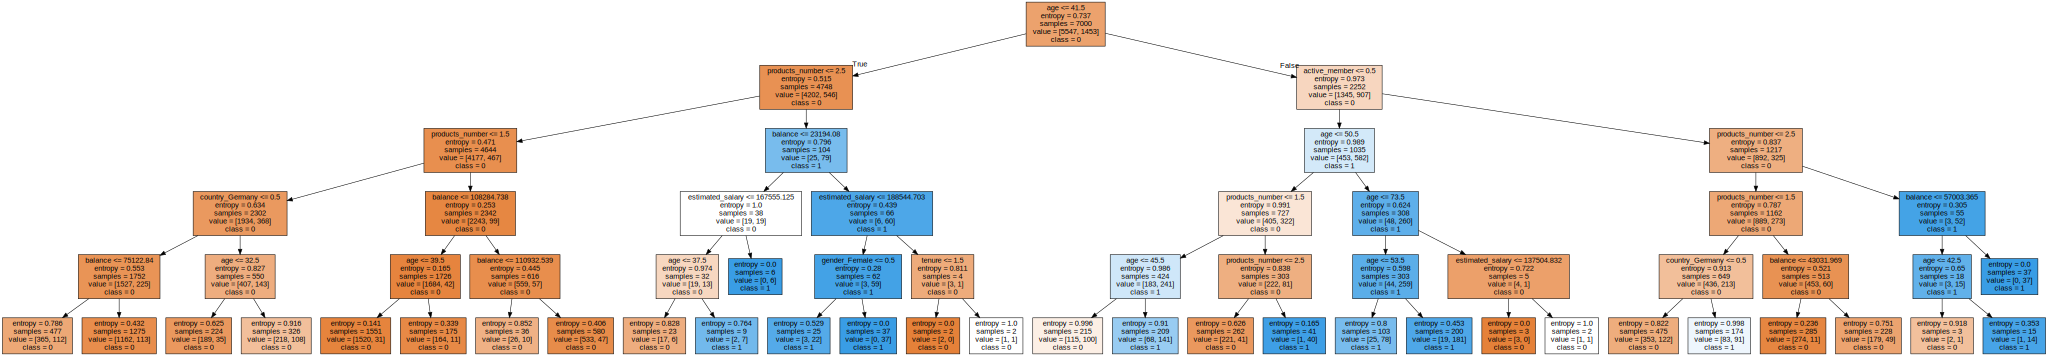

In [ ]:
# DOT data
dot_data =export_graphviz(model_entropy, out_file=None, 
              feature_names=x.columns,  
              class_names=['0', '1'],
              filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.format = "png"
graph.render("pic2")
graph

In [ ]:
pred_train_gini=model_gini.predict(x_train)
pred_train_entropy=model_entropy.predict(x_train)
pred_test_gini=model_gini.predict(x_test)
pred_test_entropy=model_entropy.predict(x_test)

將訓練資料與測試資料做評估

In [ ]:
print('Train Result\nGini:\n',f"Confusion Matrix:\n {confusion_matrix(y_train, pred_train_gini)}")
print('Entropy:\n',f"Confusion Matrix:\n {confusion_matrix(y_train, pred_train_entropy)}")

Train Result
Gini:
 Confusion Matrix:
 [[5409  138]
 [ 901  552]]
Entropy:
 Confusion Matrix:
 [[5345  202]
 [ 799  654]]


In [ ]:
print("Gini:\n",  classification_report(y_train, pred_train_gini))
print("Entropy: \n",classification_report(y_train, pred_train_entropy))

Gini:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      5547
           1       0.80      0.38      0.52      1453

    accuracy                           0.85      7000
   macro avg       0.83      0.68      0.71      7000
weighted avg       0.85      0.85      0.83      7000

Entropy: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      5547
           1       0.76      0.45      0.57      1453

    accuracy                           0.86      7000
   macro avg       0.82      0.71      0.74      7000
weighted avg       0.85      0.86      0.84      7000



In [ ]:
print('Test Result\nGini:\n',f"Confusion Matrix:\n {confusion_matrix(y_test, pred_test_gini)}")
print('Entropy:\n',f"Confusion Matrix:\n {confusion_matrix(y_test, pred_test_entropy)}")

Test Result
Gini:
 Confusion Matrix:
 [[2361   55]
 [ 373  211]]
Entropy:
 Confusion Matrix:
 [[2332   84]
 [ 329  255]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Gini:\n",  classification_report(y_test, pred_test_gini))
print("Entropy: \n",classification_report(y_test, pred_test_entropy))

Gini:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2416
           1       0.79      0.36      0.50       584

    accuracy                           0.86      3000
   macro avg       0.83      0.67      0.71      3000
weighted avg       0.85      0.86      0.84      3000

Entropy: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.75      0.44      0.55       584

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.74      3000
weighted avg       0.85      0.86      0.85      3000



其他模型


In [ ]:
logistic_model = linear_model.LogisticRegression()
score=cross_val_score(logistic_model,x_train,y_train.values.ravel(),cv=10,scoring='accuracy').mean()
print("logistic accuray=",score)
svm_model = svm.SVC()
score=cross_val_score(svm_model,x_train,y_train.values.ravel(),cv=10,scoring='accuracy').mean()
print("svm accuray=",score)
randomforest_model = ensemble.RandomForestClassifier()
score=cross_val_score(randomforest_model,x_train,y_train.values.ravel(),cv=10,scoring='accuracy').mean()
print("randomforest accuray=",score)

logistic accuray= 0.7847142857142858
svm accuray= 0.7924285714285715
randomforest accuray= 0.8575714285714285
